In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

In [2]:
gold = yf.Ticker("ABX.TO")
gold_df = gold.history(period='max')
gold_df = gold_df.drop(columns=["Dividends", "Stock Splits"])
gold_df = gold_df.loc['2010':]
gold_df["Target"] = gold_df['Close'] - gold_df['Open']
gold_df["Return"] = gold_df['Close'].pct_change()
gold_df["Pos"] = np.where(gold_df['Return'] > 0, 1, 0)
gold_df["Day of the Week"] = gold_df.index.weekday
gold_df["High Change"] = gold_df['High'].pct_change()
gold_df["Low Change"] = gold_df['Low'].pct_change()
gold_df["High/Close"] = (gold_df['High']/gold_df['Close']) - 1
gold_df["Low/Close"] = (gold_df['Low']/gold_df['Close']) - 1
gold_df["Spread"] = gold_df['High'] - gold_df['Low']
gold_df["Spread Change"] = gold_df['Spread'].pct_change()
gold_df["Volume Diff"] = gold_df["Volume"].diff()
gold_df["Volume change"] = gold_df["Volume"].pct_change()
gold_df["Return ewm"] = gold_df["Return"].ewm(span=2, adjust=False).mean()
gold_df = gold_df.dropna()
gold_df.rename(columns = {"Close": "Bar Close"},  inplace = True)
gold_df.head()

,Open,High,Low,Bar Close,Volume,Target,Return,Pos,Day of the Week,High Change,Low Change,High/Close,Low/Close,Spread,Spread Change,Volume Diff,Volume change,Return ewm
Date,,,,,,,,,,,,,,,,,,
2010-01-05,36.140938,36.457437,35.661909,36.337681,2996000,0.196743,0.009505,1,1,-0.003973,-0.003347,0.003296,-0.018597,0.795529,-0.031249,-74100.0,-0.024136,0.009505
2010-01-06,36.662736,37.424048,36.465993,36.936466,2944700,0.273730,0.016478,1,2,0.026513,0.022547,0.013201,-0.012737,0.958055,0.204300,-51300.0,-0.017123,0.014154
2010-01-07,36.696944,36.782484,36.226468,36.474537,2420100,-0.222408,-0.012506,0,3,-0.017143,-0.006568,0.008443,-0.006801,0.556016,-0.419641,-524600.0,-0.178151,-0.003619
2010-01-08,36.825275,36.842383,36.089624,36.560101,2648000,-0.265174,0.002346,1,4,0.001628,-0.003777,0.007721,-0.012869,0.752759,0.353845,227900.0,0.094170,0.000357
2010-01-11,37.629356,37.637908,36.534432,36.782501,2363100,-0.846854,0.006083,1,0,0.021593,0.012325,0.023256,-0.006744,1.103476,0.465908,-284900.0,-0.107591,0.004175


In [3]:
oil = yf.Ticker("CL=F")
oil_df = oil.history(period='max')
oil_df = pd.DataFrame(oil_df["Close"])
oil_df = oil_df.loc['2010':'2021']
oil_df["Oil Return"] = oil_df['Close'].pct_change()
oil_df = oil_df.dropna()
oil_df.rename(columns = {"Close": "Oil Close"},  inplace = True)
oil_df.head()

,Oil Close,Oil Return
Date,,
2010-01-05,81.769997,0.003190
2010-01-06,83.180000,0.017244
2010-01-07,82.660004,-0.006251
2010-01-08,82.750000,0.001089
2010-01-11,82.519997,-0.002779


In [4]:
gld = yf.Ticker("GC=F")
gld_df = gld.history(period='max')
gld_df = pd.DataFrame(gld_df["Close"])
gld_df = gld_df.loc['2010':'2021']
gld_df["gld Return"] = gld_df['Close'].pct_change()
gld_df = gld_df.dropna()
gld_df.rename(columns = {"Close": "Gold Close"},  inplace = True)
gld_df.head()

,Gold Close,gld Return
Date,,
2010-01-05,1118.099976,0.000358
2010-01-06,1135.900024,0.015920
2010-01-07,1133.099976,-0.002465
2010-01-08,1138.199951,0.004501
2010-01-11,1150.699951,0.010982


In [5]:
cad = yf.Ticker("CAD=X")
cad_df = cad.history(period='max')
cad_df = pd.DataFrame(cad_df["Close"])
cad_df = cad_df.loc['2010':'2021']
cad_df["Cad Return"] = cad_df['Close'].pct_change()
cad_df = cad_df.dropna()
cad_df.rename(columns = {"Close": "CAD Close"},  inplace = True)
cad_df.head()

,CAD Close,Cad Return
Date,,
2010-01-04,1.0410,-0.009703
2010-01-05,1.0395,-0.001441
2010-01-06,1.0319,-0.007311
2010-01-07,1.0340,0.002035
2010-01-08,1.0298,-0.004062


In [6]:
tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2021']
tsx_df["Tsx Return"] = tsx_df['Close'].pct_change()
tsx_df["Tsx Return"] = tsx_df["Tsx Return"].ewm(span=5, adjust=False).mean()
tsx_df = tsx_df.dropna()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df.head()

,TSX Close,Tsx Return
Date,,
2010-01-05,11888.099609,0.001786
2010-01-06,11944.500000,0.002772
2010-01-07,11887.500000,0.000258
2010-01-08,11953.799805,0.002031
2010-01-11,11947.099609,0.001167


In [7]:
goldmodel_df = pd.concat([gold_df, oil_df, gld_df, cad_df, tsx_df], axis=1, join="inner")
goldmodel_df = goldmodel_df.dropna()

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

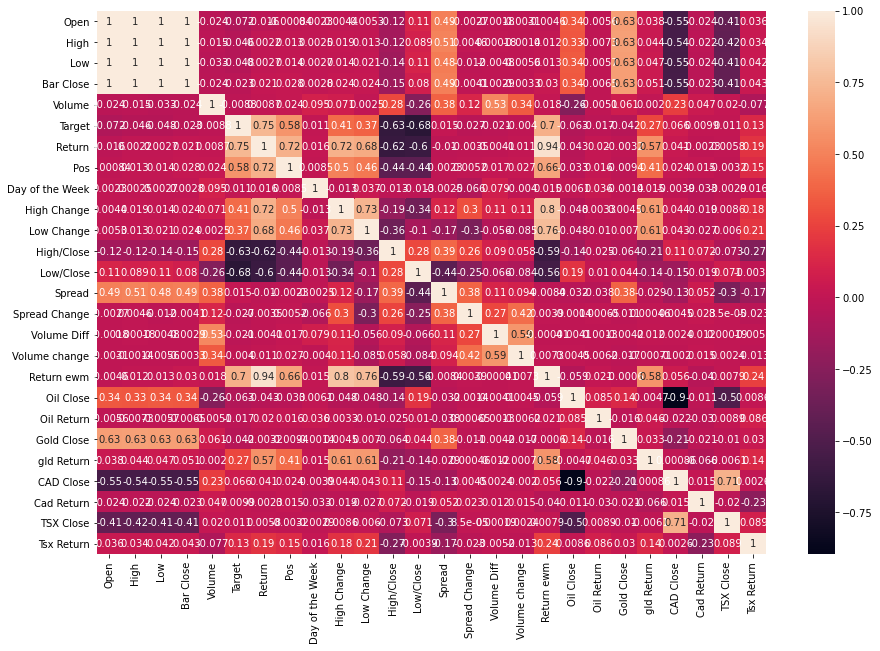

In [9]:
corrmat = goldmodel_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()

In [10]:
gold_df = goldmodel_df[["High", "Low", "High/Close", "Low/Close", "Spread", "Spread Change", "Volume", "Volume Diff", "Volume change", "Return ewm",  "Oil Close", "Oil Return", "Gold Close", "gld Return", "CAD Close", "Cad Return", "TSX Close", "Tsx Return", "Return", "Bar Close", "Day of the Week", "Pos"]]
gold_df["Pos"] = gold_df["Pos"].shift(-1)

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
gold_df = gold_df.astype(float) 
gold_df.dtypes

High               float64
Low                float64
High/Close         float64
Low/Close          float64
Spread             float64
Spread Change      float64
Volume             float64
Volume Diff        float64
Volume change      float64
Return ewm         float64
Oil Close          float64
Oil Return         float64
Gold Close         float64
gld Return         float64
CAD Close          float64
Cad Return         float64
TSX Close          float64
Tsx Return         float64
Return             float64
Bar Close          float64
Day of the Week    float64
Pos                float64
dtype: object

In [12]:
gold_csv_data = gold_df.to_csv('gold_posneg.csv', index = True) 